In [1]:
import numpy as np 
import astropy.units as u
from astropy.cosmology import z_at_value
# -- gqp_mc --
from gqp_mc import util as UT
from gqp_mc import fitters as Fitters
# -- plotting --
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [2]:
speculate = Fitters.iSpeculator()
speculate_fsps = Fitters.iSpeculator(model_name='fsps')

In [3]:
bp1 = np.random.uniform(size=100)
bp2 = np.random.uniform(size=100)
bp3 = np.random.uniform(size=100)
bp4 = np.random.uniform(size=100)

In [4]:
beta_arr = speculate._transform_to_SFH_basis(np.array([bp1, bp2, bp3, bp4]).T)
b1, b2, b3, b4 = beta_arr.T

In [5]:
theta = np.load('_theta.npy')

In [6]:
f_emu = []
for _b1, _b2, _b3, _b4 in zip(b1, b2, b3, b4): 
    _theta = theta.copy()
    _theta[0] = _b1
    _theta[1] = _b2
    _theta[2] = _b3
    _theta[3] = _b4
    spectrum = speculate._emulator(_theta)
    _w_fsps, _spectrum_fsps = speculate_fsps._fsps_model(_theta)
    spectrum_fsps = np.interp(speculate._emu_wave, _w_fsps, _spectrum_fsps)
    f_emu.append(np.median(spectrum/spectrum_fsps))

/Users/ChangHoon/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/gqp_mc-0.1-py3.7.egg/gqp_mc/fitters.py:2000: RuntimeWarning: divide by zero encountered in log10
  self._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)


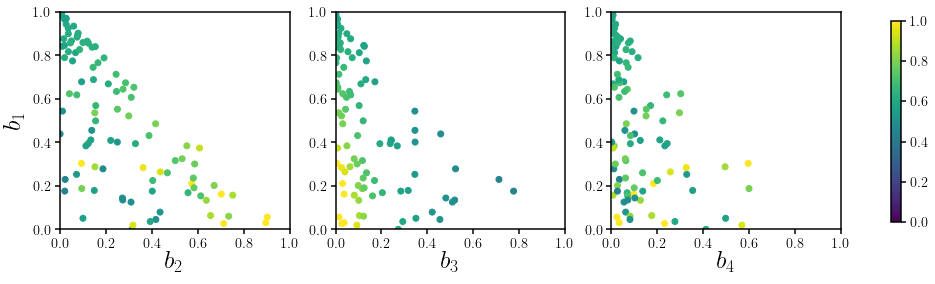

In [7]:
fig = plt.figure(figsize=(14,4))
for i in range(3): 
    sub = fig.add_subplot(1,3,i+1)
    im = sub.scatter(beta_arr.T[i+1], b1, c=np.array(f_emu), vmin=0, vmax=1)
    sub.scatter(theta[i+1], theta[0], c='r')

    sub.set_xlabel('$b_%i$' % (i+2), fontsize=25)
    sub.set_xlim(0, 1)
    if i == 0: sub.set_ylabel('$b_1$', fontsize=25)
    sub.set_ylim(0, 1)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

In [8]:
b_arr = np.array([
    50*np.random.uniform(size=100),
    50*np.random.uniform(size=100),
    50*np.random.uniform(size=100),
    50*np.random.uniform(size=100)])

In [9]:
_f_emu = []
for i in range(b_arr.shape[1]): 
    _theta = theta.copy()
    _theta[0] = b_arr[0, i]
    _theta[1] = b_arr[1, i]
    _theta[2] = b_arr[2, i]
    _theta[3] = b_arr[3, i]
    
    spectrum = speculate._emulator(_theta)
    _w_fsps, _spectrum_fsps = speculate_fsps._fsps_model(_theta)
    
    spectrum_fsps = np.interp(speculate._emu_wave, _w_fsps, _spectrum_fsps)
    _f_emu.append(np.median(spectrum/spectrum_fsps))

/Users/ChangHoon/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/gqp_mc-0.1-py3.7.egg/gqp_mc/fitters.py:2000: RuntimeWarning: divide by zero encountered in log10
  self._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)


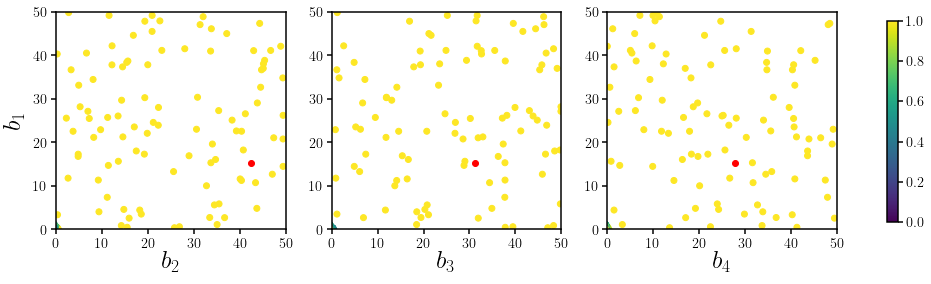

In [13]:
fig = plt.figure(figsize=(14,4))
for i in range(3): 
    sub = fig.add_subplot(1,3,i+1)
    
    sub.scatter(beta_arr.T[i+1], b1, c=np.array(f_emu), marker='^', vmin=0, vmax=1)

    im = sub.scatter(b_arr[i+1], b_arr[0], c=np.array(_f_emu), vmin=0, vmax=1)
    
    sub.scatter(theta[i+1], theta[0], c='r')

    sub.set_xlabel('$b_%i$' % (i+2), fontsize=25)
    sub.set_xlim(0, 50)
    if i == 0: sub.set_ylabel('$b_1$', fontsize=25)
    sub.set_ylim(0, 50)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

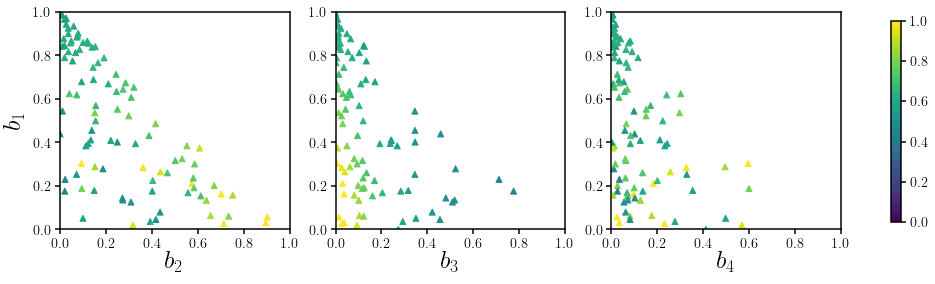

In [14]:
fig = plt.figure(figsize=(14,4))
for i in range(3): 
    sub = fig.add_subplot(1,3,i+1)
    
    sub.scatter(beta_arr.T[i+1], b1, c=np.array(f_emu), marker='^', vmin=0, vmax=1)
    
    im = sub.scatter(b_arr[i+1], b_arr[0], c=np.array(_f_emu), vmin=0, vmax=1)
    sub.scatter(theta[i+1], theta[0], c='r')

    sub.set_xlabel('$b_%i$' % (i+2), fontsize=25)
    sub.set_xlim(0, 1)
    if i == 0: sub.set_ylabel('$b_1$', fontsize=25)
    sub.set_ylim(0, 1)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)